In [1]:
%%time 
import pickle, gzip, urllib.request, json
import numpy as np

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
print(train_set[0].shape)

(50000, 784)
CPU times: user 1.05 s, sys: 320 ms, total: 1.37 s
Wall time: 22.6 s


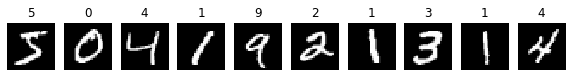

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i in range(0, 10):
    img = train_set[0][i]
    label = train_set[1][i]
    img_reshape = img.reshape((28,28))
    ax = axes[i]
    imgplot = ax.imshow(img_reshape, cmap='gray')
    ax.axis("off")
    ax.set_title(label)

plt.show()

In [35]:
%%time

import os
import boto3
import re
import copy
import time
import io
import struct
from time import gmtime, strftime
from sagemaker import get_execution_role

role = get_execution_role()

region = boto3.Session().region_name

bucket='sagemaker-200816' # Replace with your s3 bucket name
prefix = 'sagemaker/xgboost-mnist' # Used as part of the path in the bucket where you store data

def convert_data():
    data_partitions = [('train', train_set), ('validation', valid_set), ('test', test_set)]
    for data_partition_name, data_partition in data_partitions:
        
        print(f"{data_partition_name}: {data_partition[0].shape} {data_partition[1].shape}")
        
        labels = [t.tolist() for t in data_partition[1]]
        features = [t.tolist() for t in data_partition[0]]

        if data_partition_name != 'test':
            examples = np.insert(features, 0, labels, axis=1)
        else:
            examples = features
            
        print(examples.shape)

#         np.savetxt('data.csv', examples, delimiter=',')

#         key = "{}/{}/examples".format(prefix,data_partition_name)
#         url = 's3://{}/{}'.format(bucket, key)
#         boto3.Session().resource('s3').Bucket(bucket).Object(key).upload_file('data.csv')
#         print('Done writing to {}'.format(url))

convert_data()    

train: (50000, 784) (50000,)


MemoryError: Unable to allocate 299. MiB for an array with shape (50000, 785) and data type float64